# Project1_금리가 인상할 때, 가격이 크게 올랐던 섹터 및 감소했던 섹터


## 국채 10Y  Rate 관찰



(428, 1)

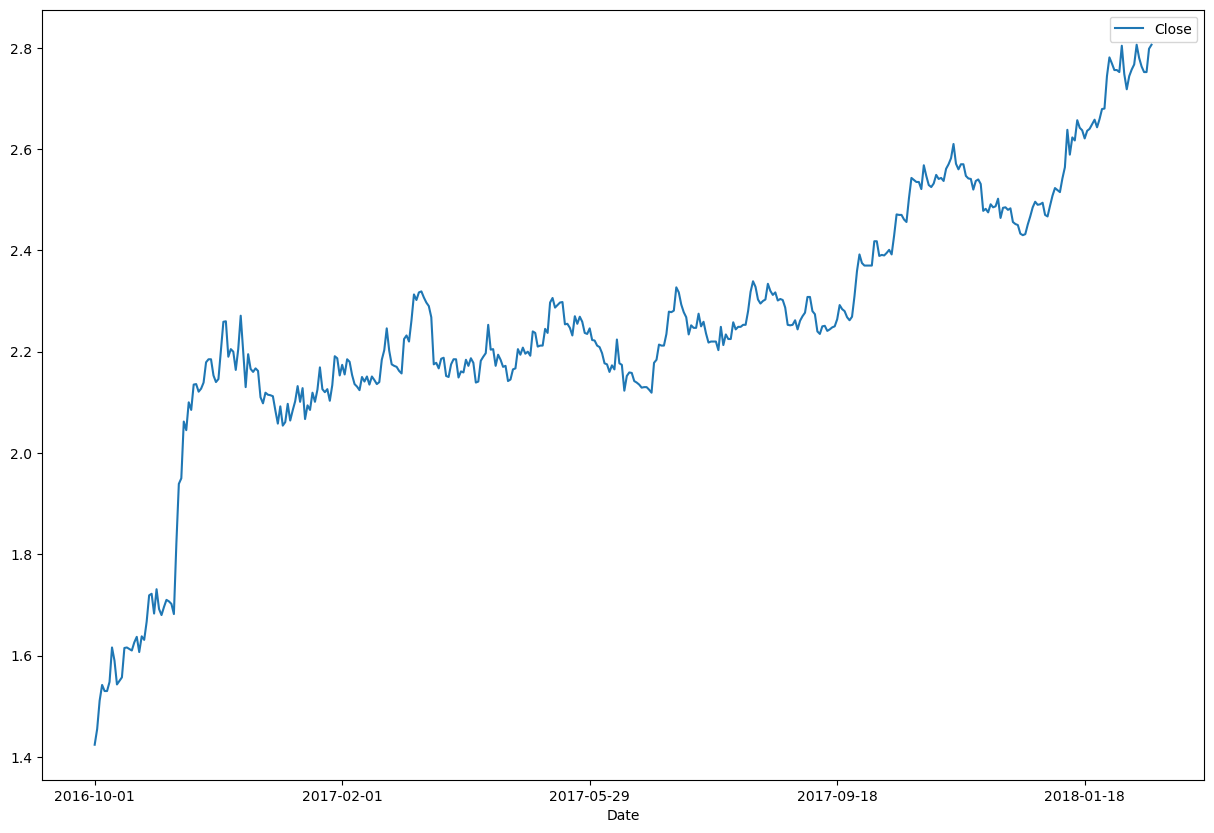

In [1]:
import pandas as pd
pd.set_option("display.max_rows",10)
import matplotlib.pyplot as plt

# rate_10_path = "/Users/kimdongwoo/pandas_study/pandas/강의자료/Data/10Y Rate.csv"
rate_10_path = "C:\\Users\\window11\\Documents\\Github\\pandas_study\\pandas\\강의자료\\Data\\10Y Rate.csv"
df_10_rate = pd.read_csv(rate_10_path, index_col = "Date")
df_10_rate_close = df_10_rate[["Close"]]
# df_10_rate_close.plot(figsize = (15,10))

drop_index = df_10_rate_close["Close"].argmin()

df_10Y_rate_close = df_10_rate_close.drop(df_10_rate_close.index[drop_index], axis=0)

#df_10Y_rate_close.plot(figsize=(15,10)) 
# df_10Y_rate_close.loc["2010-04-27":].plot(figsize= (15,10))
df_10Y_rate_close.loc["2016-10-01": "2018-02-20"].plot(figsize = (15,10))
df_10Y_rate_close_sample = df_10Y_rate_close.loc["2016-10-01": "2018-02-20"]
df_10Y_rate_close_sample.shape

## 분석할 섹터 고르기

- KODEX ETF DataFrame 만들기
- krx_df에서 KODEX ETF만 뽑아내기




In [2]:
#krx_path = "/Users/kimdongwoo/pandas_study/pandas/강의자료/Data/KRX.csv"
krx_path = "C:\\Users\\window11\\Documents\\Github\\pandas_study\\pandas\\강의자료\\Data\\KRX.csv"
krx_df = pd.read_csv(krx_path,encoding = "cp949", index_col = 0)

kodex_index = []
for i in range (krx_df.shape[0]):
    if("KODEX" in krx_df["Name"].values[i]):
        kodex_index.append(i)

kodex_etf_info = krx_df.iloc[kodex_index]
kodex_etf_info.shape

# 섹터 고르기(20개)
sector_list = ['KODEX 200', 'KODEX IT', 'KODEX 건설', 'KODEX 게임산업', 'KODEX 경기소비재', 'KODEX 고배당', 'KODEX 골드선물(H)',
              'KODEX 구리선물(H)', 'KODEX 기계장비', 'KODEX 바이오', 'KODEX 반도체', 'KODEX 보험', 'KODEX 에너지화학', 'KODEX 운송',
              'KODEX 은행', 'KODEX 자동차', 'KODEX 증권', 'KODEX 철강', 'KODEX 필수소비재', 'KODEX 헬스케어']

# 리스트 컴프리헨션
#kodex_index_1 = [index for index in range(krx_df.shape[0]) if "KODEX" in krx_df["Name"].values[index]]

# KODEX Sector DataFrame

- 위에서 선택한 Sector_list에 해당하는 KODEX Sector DF를 만든다
- 관찰할 Sample DataFrame을 만든다

In [3]:
kodex_etf_path = "C:\\Users\\window11\\Documents\\Github\\pandas_study\\pandas\\강의자료\\Data\\KODEX_ETF.csv"
kodex_etf_price_df = pd.read_csv(kodex_etf_path, index_col = "Date")

# kodex_etf_info["Name"].isna(sector_list).sum()

kodex_etf_price_df

,KODEX 200,KODEX 200 중소형,KODEX 200ESG,KODEX 200IT TR,KODEX 200TR,KODEX 200exTOP,KODEX 200가치저변동,KODEX 200동일가중,KODEX 200롱코스닥150숏선물,KODEX 200미국채혼합,...,KODEX 코스피100,KODEX 코스피TR,KODEX 코스피대형주,KODEX 콩선물(H),KODEX 퀄리티Plus,KODEX 탄소효율그린뉴딜,KODEX 필수소비재,KODEX 한국대만IT프리미어,KODEX 헬스케어,KODEX 혁신기술테마액티브
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-02,20592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8840,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,21239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8860,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,21118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8960,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,21081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8995,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,20784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8860,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,39820,13590.0,14300.0,13960.0,13070.0,13325.0,10925.0,11990.0,10305.0,13320.0,...,30660.0,13890.0,14075.0,11570,10355.0,9715.0,8370.0,20830.0,15875.0,13145.0
2021-12-24,40115,13745.0,14470.0,14135.0,13160.0,13425.0,10955.0,12070.0,10300.0,13340.0,...,30795.0,13960.0,14175.0,11525,10405.0,9790.0,8350.0,20855.0,15785.0,13210.0
2021-12-27,39880,13735.0,14385.0,14000.0,13100.0,13405.0,10925.0,12060.0,10180.0,13320.0,...,30630.0,13905.0,14095.0,11640,10475.0,9775.0,8350.0,21025.0,16015.0,13195.0


In [4]:
kodex_sector_df = kodex_etf_price_df[sector_list]
kodex_sector_df
kodex_sector_df.isna().sum(axis = 0)

KODEX 200         0
KODEX IT       1292
KODEX 건설          0
KODEX 게임산업     1614
KODEX 경기소비재    1292
               ... 
KODEX 자동차         0
KODEX 증권          0
KODEX 철강          0
KODEX 필수소비재    1292
KODEX 헬스케어     1292
Length: 20, dtype: int64

In [5]:
kodex_sector_df.loc['2016-10-01':'2018-02-20'].isna().sum(axis = 0)

KODEX 200        0
KODEX IT       121
KODEX 건설         0
KODEX 게임산업     340
KODEX 경기소비재    121
              ... 
KODEX 자동차        0
KODEX 증권         0
KODEX 철강         0
KODEX 필수소비재    121
KODEX 헬스케어     121
Length: 20, dtype: int64

In [6]:
# 날짜기간과 안 맞는 Sector을 분별한다

drop_list = ['KODEX 게임산업', 'KODEX 고배당', 'KODEX IT', 'KODEX 필수소비재', 'KODEX 헬스케어', 'KODEX 경기소비재']
kodex_sector_df = kodex_sector_df.drop(drop_list, axis = 1)
kodex_sector_df

,KODEX 200,KODEX 건설,KODEX 골드선물(H),KODEX 구리선물(H),KODEX 기계장비,KODEX 바이오,KODEX 반도체,KODEX 보험,KODEX 에너지화학,KODEX 운송,KODEX 은행,KODEX 자동차,KODEX 증권,KODEX 철강
Date,,,,,,,,,,,,,,
2012-01-02,20592,5101,11975,7900,14745,NaN,13969,5784,9967,4966,5359,19290,4849,9084
2012-01-03,21239,5234,12110,7990,15434,NaN,14180,5862,10349,5117,5513,19829,5003,9348
2012-01-04,21118,5224,12170,8000,15539,NaN,14097,5877,10258,5141,5435,19936,5017,9528
2012-01-05,21081,5255,12380,7955,15419,NaN,14102,5889,10510,5131,5376,20051,5012,9605
2012-01-06,20784,5116,12390,7920,15203,NaN,13983,5784,10294,5047,5345,19657,4926,9433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,39820,3375,12195,8085,5550,12315.0,38760,6545,18030,5755,7550,20925,8135,8530
2021-12-24,40115,3400,12200,8080,5530,12200.0,38700,6565,18235,5740,7565,21585,8175,8540
2021-12-27,39880,3350,12220,8010,5495,12340.0,38575,6580,18180,5660,7475,21460,8140,8480
